<a href="https://colab.research.google.com/github/bryaanabraham/Churn_Analysis/blob/main/churn_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Visualization

[*References*](https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/)

The snippets in this section focus on loading the data from the csv file and processing it according to out needs.
- Attributes not affecting the Exit rate were dropped ('RowNumber', 'Surname', 'CustomerID') to nullify unnecessary dependancies on irrelevant variables
- Row values are encoded based on number of identities (Eg: Male = 1, Female = 0)
- All datatypes are converted to floats (this was done to allow passage of attributes into an ANN)
- Data was visualized to depict the variance based on attributes

<br>

#### *Inference of Processing and Visualization:*
- Exit rate is highly dependant on (Values are varying Significantly):
  - Credit Score
  - Age
  - Balance
  - salary
- It is moderately Dependant on (Values with moderatley):
  - tenure
- Low Dependance on (Values with little variance):
  - geography
  - gender
  - no. of products
  - has cred card
  - is active member
- Dependancy of remaining attributes is inadvertent i.e. Exited status may vary with changes in name, cutomerId and RowNumber but it is not a factor which should to be considered


In [88]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('Churn_Modelling.csv')

In [90]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [91]:
df.drop('RowNumber', axis=1, inplace=True)
df.drop('Surname', axis=1, inplace=True)
df.drop('CustomerId', axis=1, inplace=True)

In [92]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [94]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [95]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [96]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [97]:
# France : 0, Spain : 1, Germany : 2
df['Geography'] = df['Geography'].apply(lambda x: 0 if x == 'France' else(1 if x == 'Spain' else 2))

In [98]:
for col in df.columns:
  df[col] = df[col].astype(float)
df.dtypes

CreditScore        float64
Geography          float64
Gender             float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

In [99]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,1.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,1.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [100]:
df.shape

(10000, 11)

In [101]:
def hist_plot(col):
  plt.figure(figsize=(10, 8))
  plt.hist(df[df['Exited'] == 0][col], bins=30, alpha=0.5, label='Not Exited')
  plt.hist(df[df['Exited'] == 1][col], bins=30, alpha=0.5, label='Exited')

  variance_not_exited = df[df['Exited'] == 0][col].var()
  variance_exited = df[df['Exited'] == 1][col].var()

  plt.title(f'Histogram Comparing {col} and Exited\nVariance (Not Exited): {variance_not_exited:.4f}\nVariance (Exited): {variance_exited:.4f}')
  plt.xlabel(col)
  plt.ylabel('Number of Customers')
  plt.legend()
  plt.show()


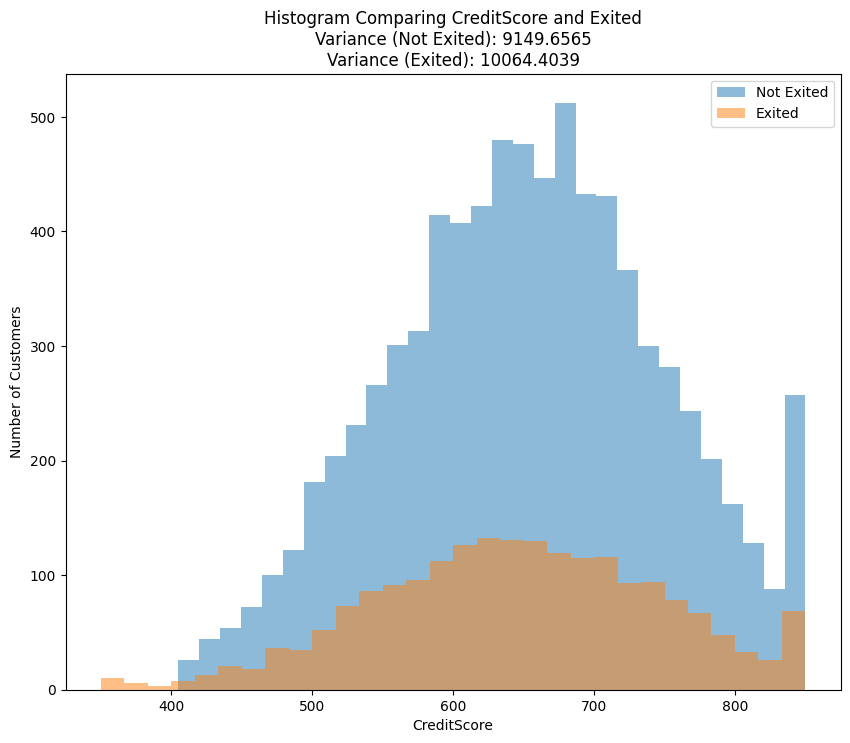

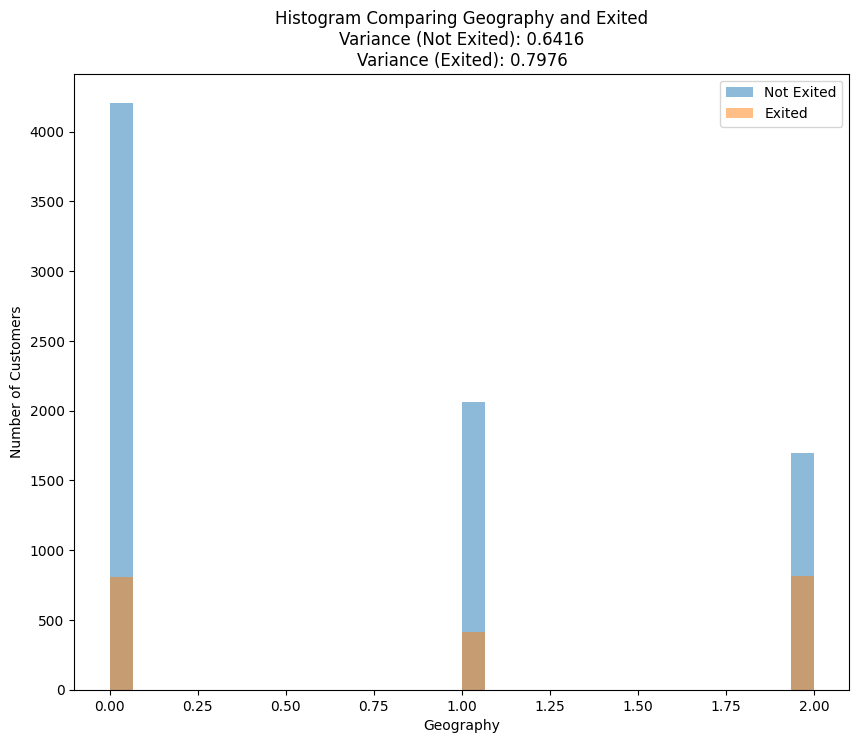

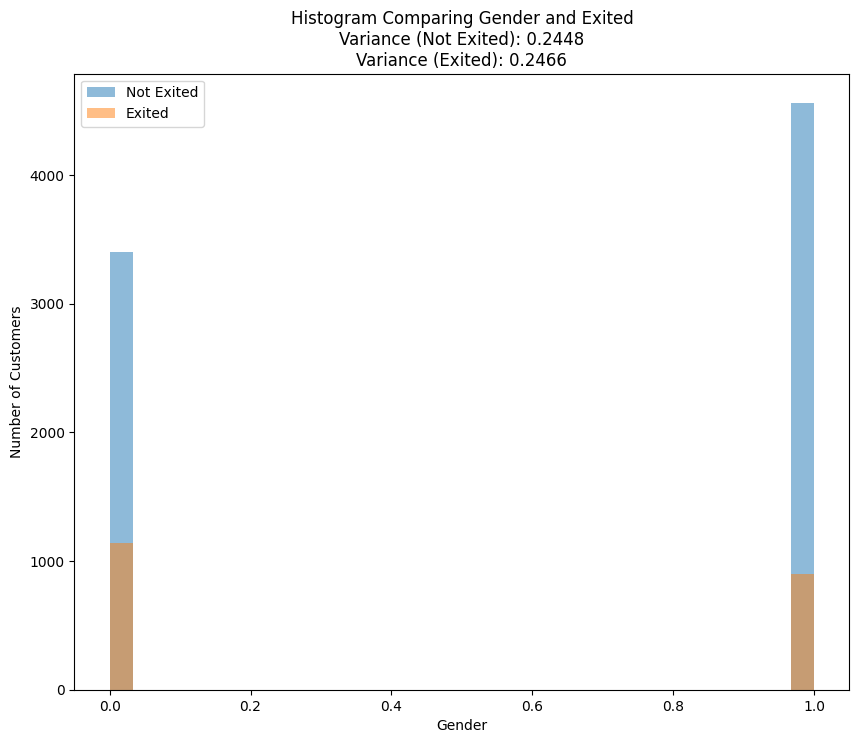

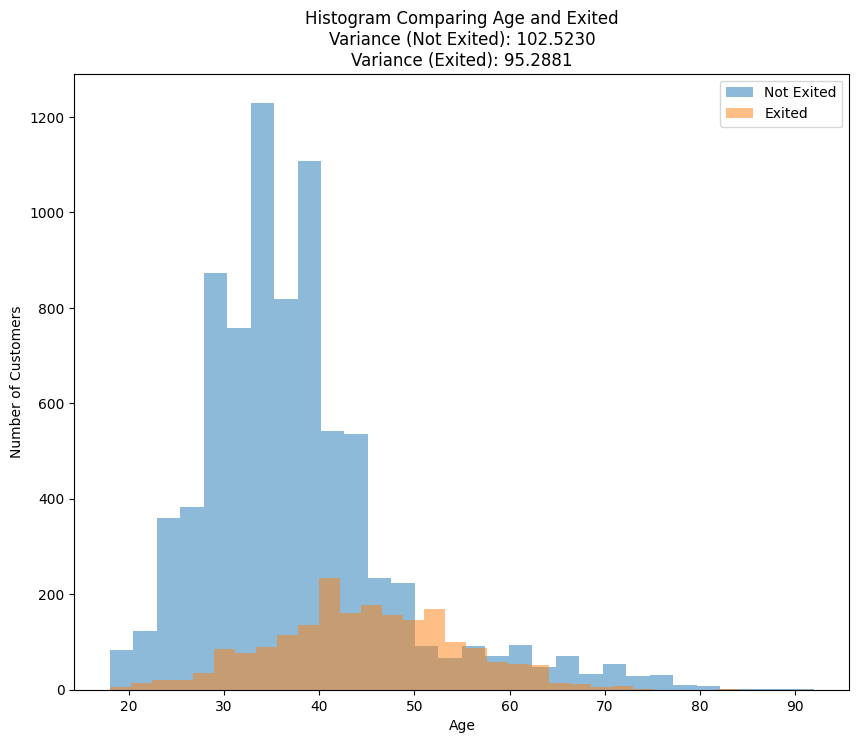

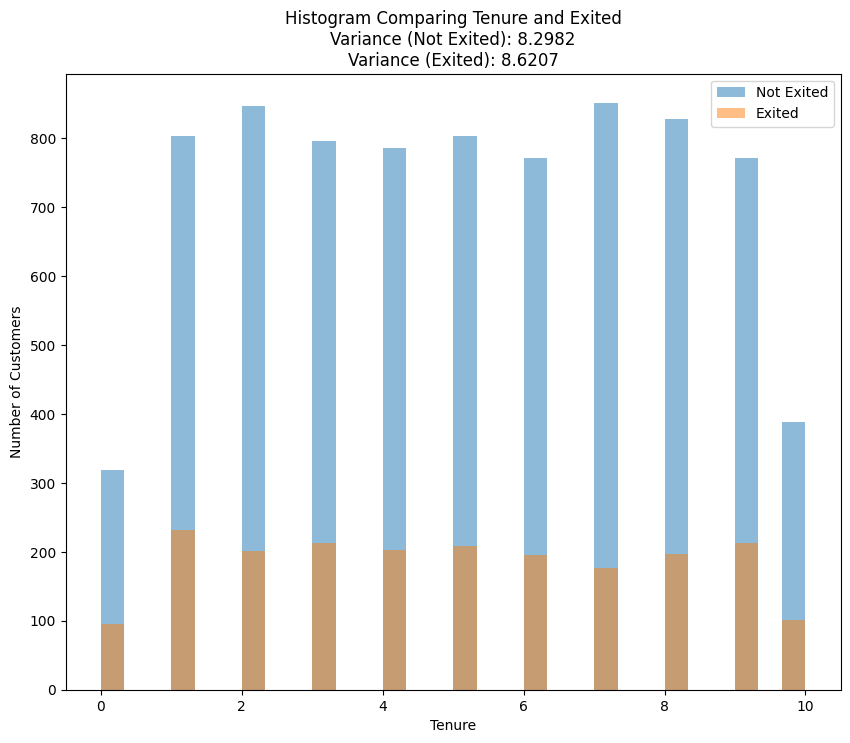

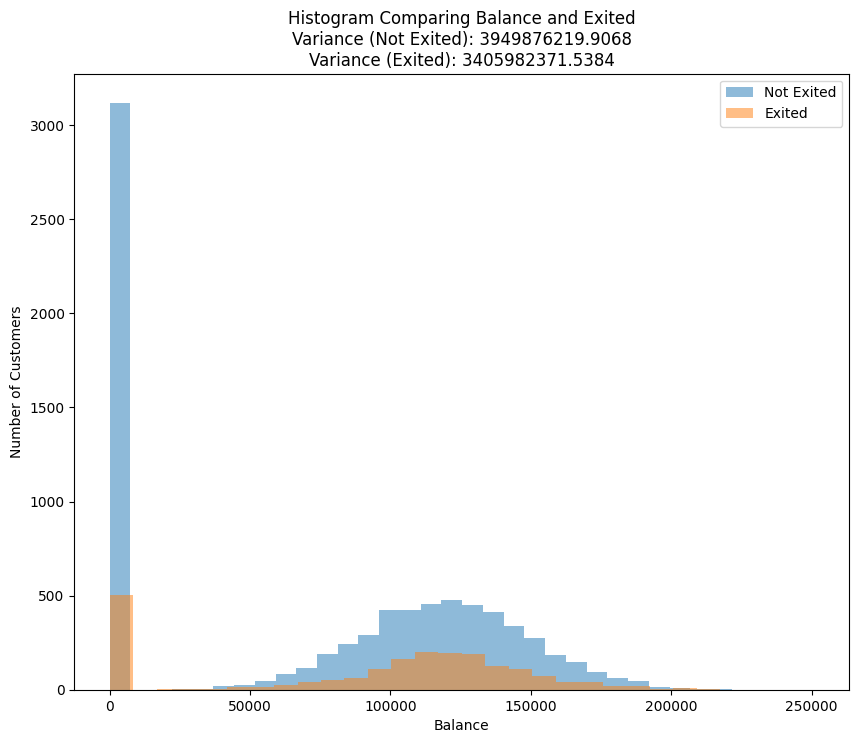

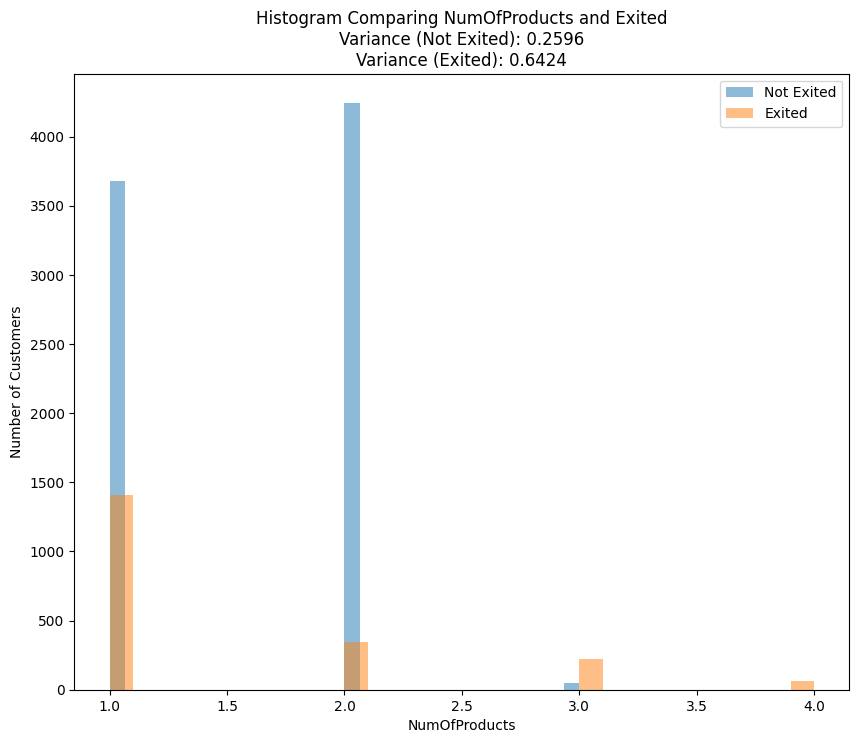

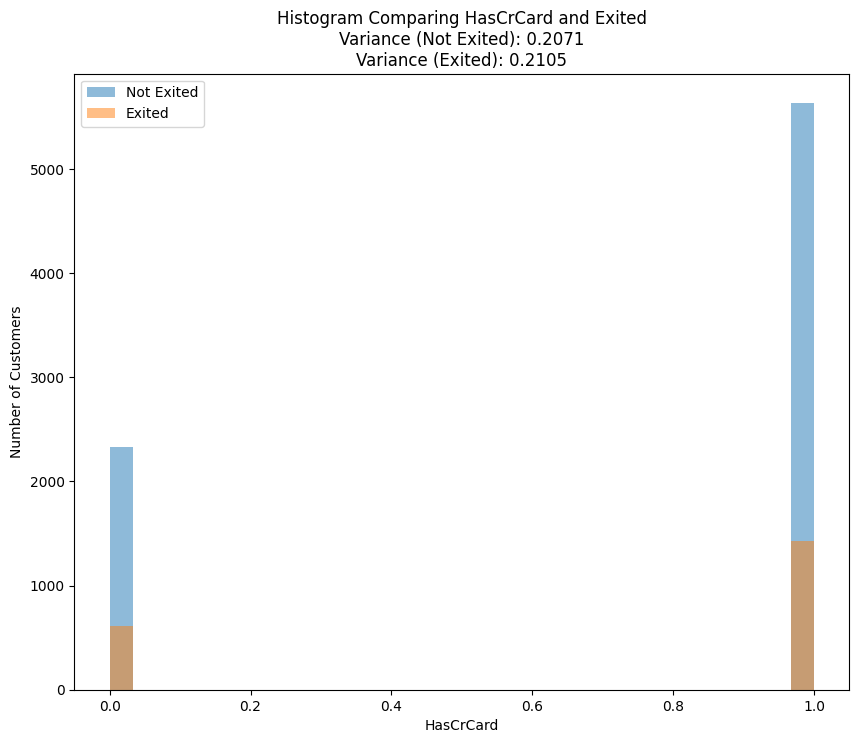

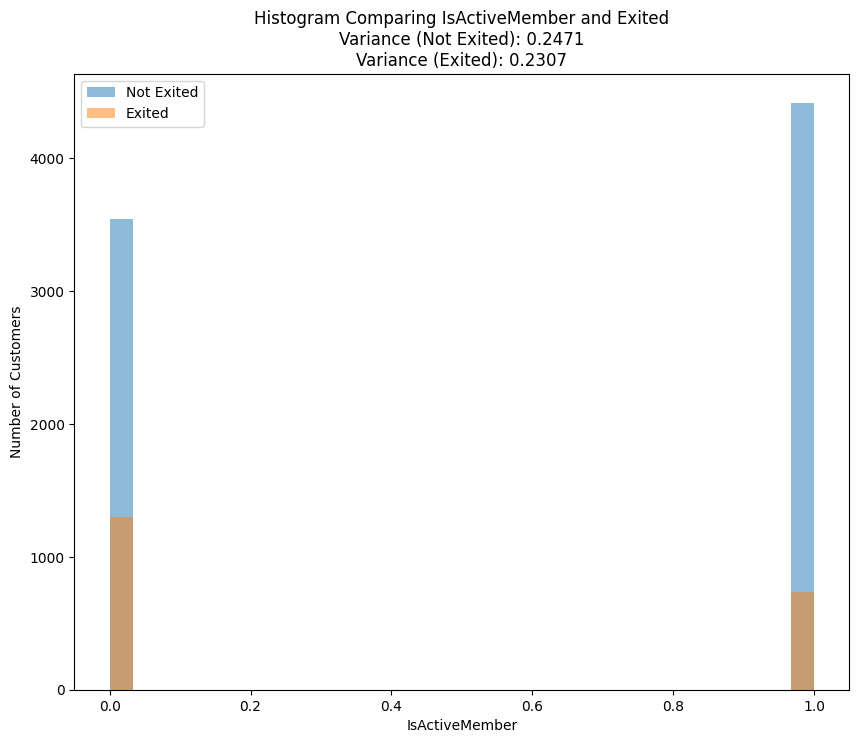

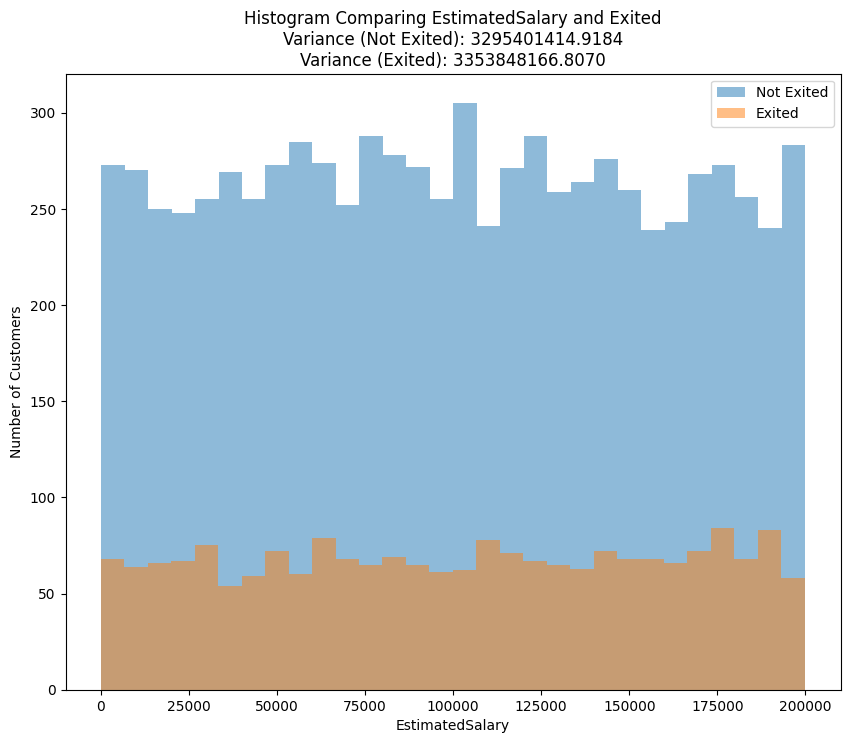

In [102]:
for col in df.columns:
  if col != 'Exited':
    hist_plot(col)
    print()
    print()

# Train-Test data Split

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [104]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape )

(8000, 10) (2000, 10) (8000,) (2000,)


In [105]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686.0,0.0,1.0,32.0,6.0,0.00,2.0,1.0,1.0,179093.26
1561,632.0,2.0,1.0,42.0,4.0,119624.60,2.0,1.0,1.0,195978.86
1670,559.0,1.0,1.0,24.0,3.0,114739.92,1.0,1.0,0.0,85891.02
6087,561.0,0.0,0.0,27.0,9.0,135637.00,1.0,1.0,0.0,153080.40
6669,517.0,0.0,1.0,56.0,9.0,142147.32,1.0,0.0,0.0,39488.04


In [106]:
y_train.head()

9254    0.0
1561    0.0
1670    1.0
6087    1.0
6669    1.0
Name: Exited, dtype: float64

In [107]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Artificial Neural Network (ANN)
[*References*](https://www.upgrad.com/blog/classification-model-using-artificial-neural-networks/)


The model shows good accuracy but doesn't perform well in practice. Its performance is judged by how well it finds True Positives (correctly identified positive cases) and True Negatives (correctly identified negative cases). Even with high accuracy, the model might not work well if it fails to balance these important measures.

In [108]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

import pickle

In [109]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [110]:
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=10, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

In [111]:
ann_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [112]:
ann_model.fit(X_train_scaled, y_train, epochs=25, batch_size=10)

Epoch 1/25
800/800 [==============================] - 2s 2ms/step - loss: 0.4660 - accuracy: 0.7981
Epoch 2/25
800/800 [==============================] - 3s 4ms/step - loss: 0.4041 - accuracy: 0.8300
Epoch 3/25
800/800 [==============================] - 2s 3ms/step - loss: 0.3687 - accuracy: 0.8450
Epoch 4/25
800/800 [==============================] - 2s 2ms/step - loss: 0.3562 - accuracy: 0.8514
Epoch 5/25
800/800 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.8541
Epoch 6/25
800/800 [==============================] - 2s 3ms/step - loss: 0.3461 - accuracy: 0.8562
Epoch 7/25
800/800 [==============================] - 2s 3ms/step - loss: 0.3430 - accuracy: 0.8572
Epoch 8/25
800/800 [==============================] - 2s 2ms/step - loss: 0.3392 - accuracy: 0.8579
Epoch 9/25
800/800 [==============================] - 2s 3ms/step - loss: 0.3381 - accuracy: 0.8602
Epoch 10/25
800/800 [==============================] - 2s 3ms/step - loss: 0.3376 - accuracy: 0.8601

In [113]:
_, accuracy = ann_model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy*100 :.2f} %')

63/63 [==============================] - 0s 3ms/step - loss: 0.3385 - accuracy: 0.8600
Accuracy: 86.00 %


63/63 [==============================] - 0s 2ms/step


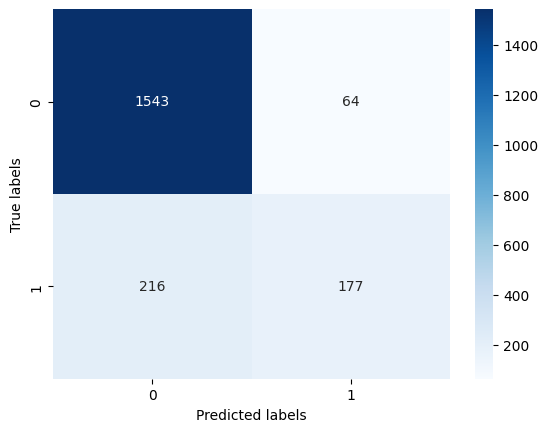

In [114]:
y_pred = ann_model.predict(X_test_scaled)
y_pred_binary = [int(round(p[0])) for p in y_pred]
conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

We can see that the model accuracy is high but the performance is poor: true positives need to be higher

In [115]:
pickle.dump(ann_model, open('ann_model.sav', 'wb'))

# Random Forest Algorithm
[*Referenes*](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/)


In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [117]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=5)

rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f} %')
print(f'Classification Report: {classification_rep}')

Accuracy: 86.60 %
Classification Report:               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1607
         1.0       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



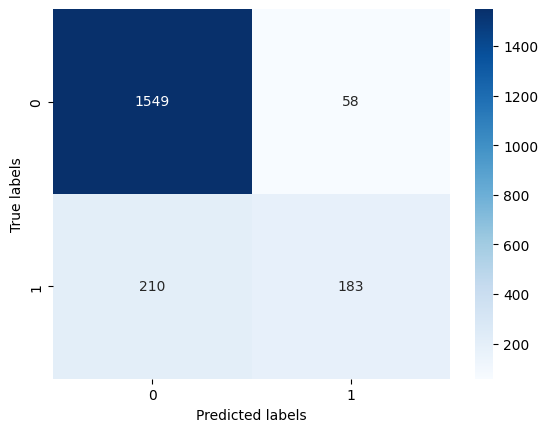

In [118]:
y_pred = rf_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [119]:
pickle.dump(rf_classifier, open('rf_model.pkl', 'wb'))

# Output Justification and Potential Solution
### SHAP (SHapley Additive exPlanations)
[*References*](https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability)

[*YouTube (SHAP basics)*](https://youtu.be/L8_sVRhBDLU?si=8Rf_oHKAbb4DBNv3)

In [120]:
!pip install shap
import shap
shap.initjs()

In [121]:
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test[:100])

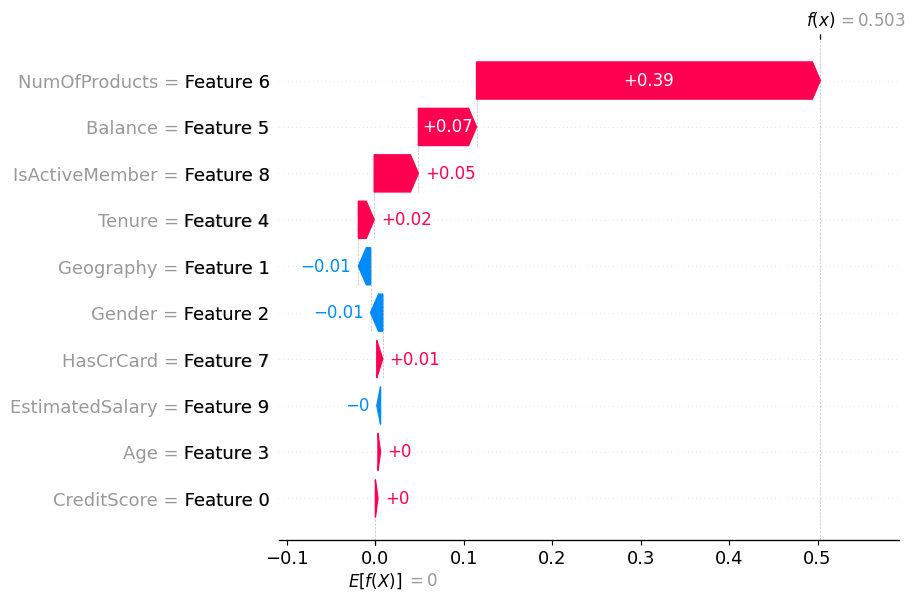

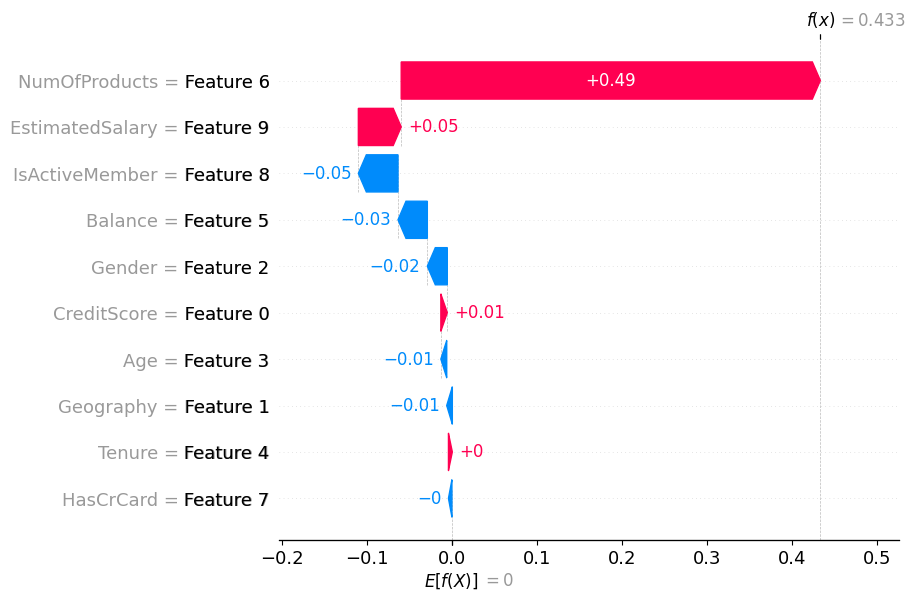

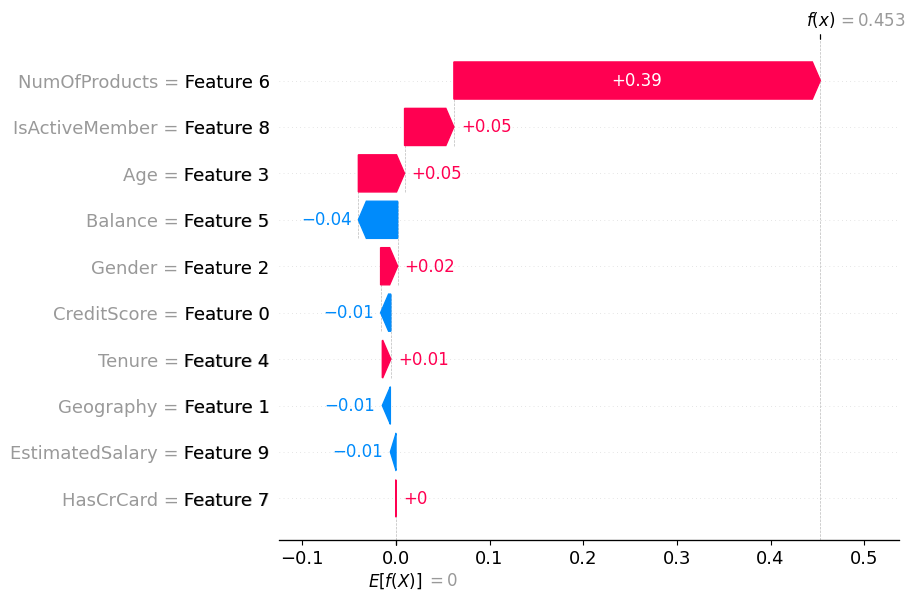

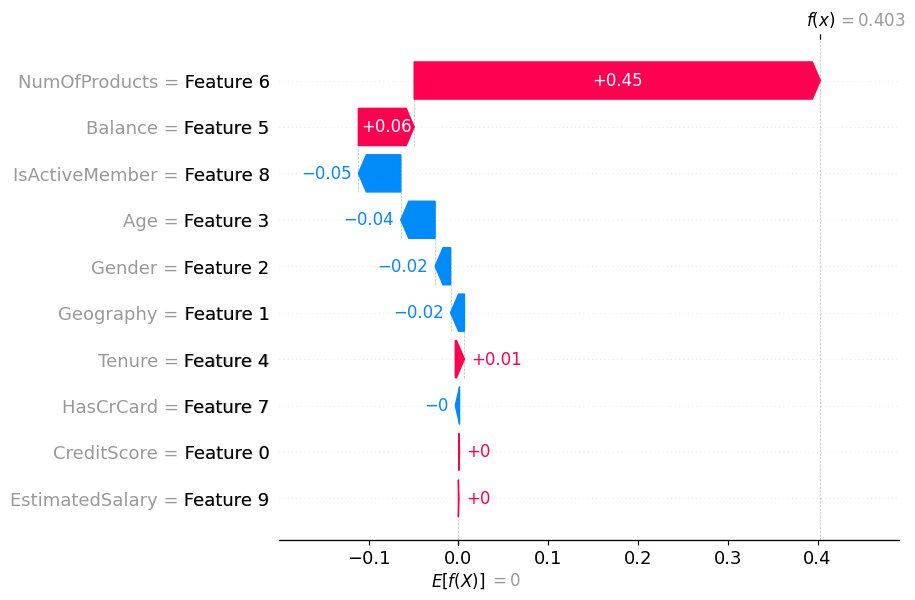

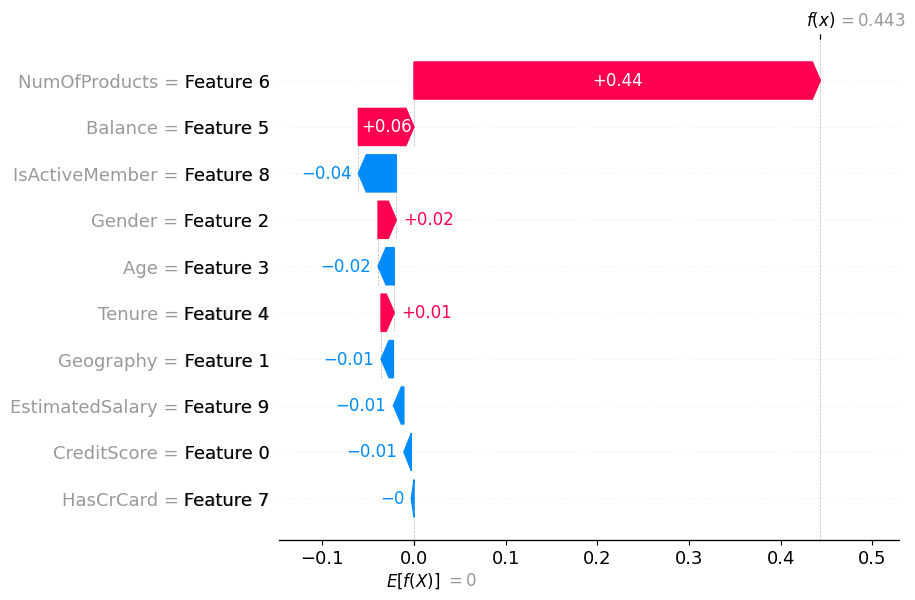

In [140]:
features = X_test.columns
for i in range (5):
  sample_shap_values = shap_values[i, :, 1]
  explanation = shap.Explanation(values=sample_shap_values, base_values=0, data=features)
  shap.waterfall_plot(explanation)
  print()

We can see that number of products played a major role in making the final prediction(Considering the first 5 test values only): Solutions can be made accordingly (Eg: Increase products provided under subscriptions -> Alternatively products can be utilized by users under free trials)